# Mental Health Care in the Last 4 Weeks
Metadata Updated: April 15, 2023

The U.S. Census Bureau, in collaboration with five federal agencies, launched the Household Pulse Survey to produce data on the social and economic impacts of Covid-19 on American households. The Household Pulse Survey was designed to gauge the impact of the pandemic on employment status, consumer spending, food security, housing, education disruptions, and dimensions of physical and mental wellness.

The survey was designed to meet the goal of accurate and timely weekly estimates. It was conducted by an internet questionnaire, with invitations to participate sent by email and text message. The sample frame is the Census Bureau Master Address File Data. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond for him or herself. Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, gender, race and ethnicity, and educational attainment. All estimates shown meet the NCHS Data Presentation Standards for Proportions.

In [16]:
import pandas as pd
import re
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.neighbors
import sklearn.tree
import matplotlib.pyplot
import sklearn.inspection

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats


# Modify this to point to your data.
unique_data = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv', sep = ",")
unique_data[0:5]

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [17]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [18]:
unique_data.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


# Unique Data Points
Variety of these points will be visualized to help me in understanding what kind of data I am working with and what unique data I will have to account for.

In [19]:
def unique_data_points(frame):
    points = ""
    for col in frame:
        points += col
        points += "\n"
        unique_points = set()
        for item in frame[col]:
            unique_points.add(item)
        for item in unique_points:
            points += str(item) + "\t"
        #print(unique_points)
        points += "\n\n"
    print(points[0:20000])

unique_data_points(unique_data)

Indicator
Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks	Took Prescription Medication for Mental Health, Last 4 Weeks	Received Counseling or Therapy, Last 4 Weeks	Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks	

Group
By Disability status	By State	By Age	By Education	By Sex	By Presence of Symptoms of Anxiety/Depression	By Sexual orientation	By Race/Hispanic ethnicity	By Gender identity	National Estimate	

State
United States	Alabama	Indiana	Connecticut	Rhode Island	Washington	Pennsylvania	California	Vermont	Wisconsin	Kansas	Minnesota	Mississippi	District of Columbia	Missouri	Illinois	Kentucky	Massachusetts	South Carolina	Ohio	New Jersey	Oklahoma	North Carolina	New Hampshire	Tennessee	Florida	Iowa	Louisiana	South Dakota	West Virginia	Texas	Nebraska	Wyoming	Georgia	Idaho	Hawaii	Arizona	Maryland	Montana	Michigan	Utah	New Mexico	Alaska	Delaware	Maine	North Dakota	Arkansas	Nevada	Oregon	New York	Virginia	Colorado	

Subgroup


# Notes for columns in dataset

Things to remember when manipulating the data.
- Indicator has 4 different labels(one hot encode)
- Group has corresponding subgroups, it may be more effective to model each group since some data with some data point does not reflect other data points (sexual orientation and age not in the same subgrouping)
- State has 50 states + 1 United States; one hot encode
- Phase get rid of dates
- Time; okay
- Time period Label, Time Period Start Date, Time Period End Date can be removed for now (possible relation by month?)
- Value; okay
- LowCI; okay
- HighCI; okay
- Quartile Range; plot LowCI with HighCI to see IQR (Likely to remove)
- Supression Flag (Likely to remove)
- Looks like all missing values are consistent in data

In [20]:
def nan_data(frame):
    nan = set()
    data = 0
    for col in frame:
        data = 0;   
        for i, item in enumerate(frame[col]):
            if (pd.isnull(frame.loc[i, col])):
                nan.add(col)
                data += 1
        print(col, str(data))            

In [21]:
nan_data(unique_data)

Indicator 0
Group 0
State 0
Subgroup 0
Phase 0
Time Period 0
Time Period Label 0
Time Period Start Date 0
Time Period End Date 0
Value 490
LowCI 490
HighCI 490
Confidence Interval 490
Quartile Range 3672
Suppression Flag 10382


# Data Cleaning

Some things you may want to do:
 - Deal with missing/empty values (get rid of data)
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

'Indicator' has 4 unique values which are:

- 0: 'Took Prescription Medication for Mental Health, Last 4 Weeks'
- 1: 'Received Counseling or Therapy, Last 4 Weeks'
- 2: 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
- 3: 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'

Of which I will represent each value by values 1 through 4. After looking at the third value, I believe that it would be best to separate it as its own subgroup in the values of 'Indicator'.

'Time Period', 'Time Period Label', 'Time Period Start Date', and 'Time Period End Date' are all connected to each other and do not need multiple columns to represent. Nor, does this data represent anything meaningful towards predicting the indicator.

In [22]:
#DON'T FORGET TO ADD A FUNCTION TO CHANGE DTYPES

def data_clean(frame):
    new_frame = frame.copy(deep = True)
    Time_Period = frame['Time Period Start Date'].astype(str) + "-" + frame['Time Period End Date']

    # Indicator's 4 unique values will be become numerical for flexibility
    for count, val in enumerate(frame['Indicator'].unique()):
        new_frame.loc[new_frame['Indicator'] == val, 'Indicator'] = count
    new_frame['Indicator'] = new_frame['Indicator'].astype(int)

    # Dropping frames that I have no context for and/or are the same data
    new_frame.drop(columns=['Phase', 'Time Period', 'Time Period Label', 'Quartile Range', 'Suppression Flag', 'Confidence Interval', 'Time Period Start Date', 'Time Period End Date'], axis = 1, inplace = True)
    # Dropping rest of data that has NA values
    new_frame.dropna(how = 'any', inplace = True)

    return new_frame

cleaned_frame = data_clean(unique_data)
cleaned_frame.dtypes
cleaned_frame

,Indicator,Group,State,Subgroup,Value,LowCI,HighCI
0,0,National Estimate,United States,United States,19.4,19.0,19.8
1,0,By Age,United States,18 - 29 years,18.7,17.2,20.3
2,0,By Age,United States,30 - 39 years,18.3,17.3,19.2
3,0,By Age,United States,40 - 49 years,20.4,19.5,21.3
4,0,By Age,United States,50 - 59 years,21.2,20.2,22.2
...,...,...,...,...,...,...,...
10399,3,By State,Virginia,Virginia,10.1,7.1,13.8
10400,3,By State,Washington,Washington,14.8,12.5,17.4
10401,3,By State,West Virginia,West Virginia,9.8,6.6,13.8
10402,3,By State,Wisconsin,Wisconsin,11.6,8.5,15.3


In [23]:
cleaned_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 10403
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  9914 non-null   int64  
 1   Group      9914 non-null   object 
 2   State      9914 non-null   object 
 3   Subgroup   9914 non-null   object 
 4   Value      9914 non-null   float64
 5   LowCI      9914 non-null   float64
 6   HighCI     9914 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 619.6+ KB


# Scaling

To be able to interpret the data better, the data will be standardized. There are two scalers that I am looking at:

- Standard Scaler
- MinMax Scaler

Standard Scalers are useful for Gaussian distributions 
MinMax Scalers are useful for values of fixed range

Although I do not know the metadata, I know that the value is based off of a survey of which values, LowCI, and HighCI which are values in between 0.80... and 71.90.... I also know that most of the data made from the plots are normal distribution or not heavily skewed. 

In [24]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

cleaned_frame[['Value', 'LowCI', 'HighCI']] = scaler.fit_transform(cleaned_frame[['Value', 'LowCI', 'HighCI']])
cleaned_frame

,Indicator,Group,State,Subgroup,Value,LowCI,HighCI
0,0,National Estimate,United States,United States,0.235699,0.552086,-0.074642
1,0,By Age,United States,18 - 29 years,0.151057,0.317069,-0.019406
2,0,By Age,United States,30 - 39 years,0.102690,0.330126,-0.140925
3,0,By Age,United States,40 - 49 years,0.356616,0.617369,0.091066
4,0,By Age,United States,50 - 59 years,0.453349,0.708765,0.190491
...,...,...,...,...,...,...,...
10399,3,By State,Virginia,Virginia,-0.888828,-1.001639,-0.737474
10400,3,By State,Washington,Washington,-0.320519,-0.296587,-0.339774
10401,3,By State,West Virginia,West Virginia,-0.925103,-1.066922,-0.737474
10402,3,By State,Wisconsin,Wisconsin,-0.707452,-0.818848,-0.571766


# One Hot Encoding

For the presented data, I will one-hot encode the ~~'Time Period' ,~~ 'State' ~~and the 'Phase'~~ column.

~~In figuring out if 'Time Period Label' was a factor towards understanding the correlation between the 'Indicator' and 'Time Period Label', I thought it would be the best to separate the~~
~~data into the months in which each data was found `{month}{month}` such that I can see the correlation to when an indicator was more likely to be present during one day or the other ex.~~ ~~(JanJan).~~ 
- ~~JanJan~~
- ~~JanFeb~~
- ~~...~~
- ~~Dec...Jan~~

~~I will also one-hot encode the 'Phase' column as well as such values are numerical for the use of what phase they are in, not for some measurement.~~
~~'State' will also be one_hot encoded~~

The above was striked through due to the data not giving correlations to value and indicator. About the same number of people were used at the same times during each time period and period.

Much of the data that will be one hot encoded will be the groups and subgroups. Subgroups like 'By Age', 'By Sex', etc. are needed to be one hot encoded to get '18 - 29 years', '80 years and above', etc.


In [25]:
def one_hot_encode(frame, columns):
    for column in columns:
        one_hot_col = pd.get_dummies(frame[column], prefix = column, dtype= float)
        frame = pd.concat([frame, one_hot_col], axis = 1)
        frame.pop(column)
    return frame

# Multiple Groups and Subgroups
There are multiple groups in the data of which different data such as sex, state, age and etc. where the data does not show multiple groupings in the same data. To account for this, I will make a dictionary of dataframes where the key will be the grouping and the value will be dataframes with the grouping dropped.

After making the dictionary, I should make sense of the groupings and the unique subgrouping values. For example,

- The 'National Estimate' group dataframe's 'State' and 'Subgroup' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Age' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Sex' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Presence of Symptoms of Anxiety/Depression' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Race/Hispanic ethnicity' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Education' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By State' group dataframe's 'State' and 'Subgroup' column are the same column, therefore it would be better to delete one of the columns

- The 'By Disability status' group dataframe needs to be one-hot-encoded

- The 'By Sexual orientation' group dataframe needs to be one-hot-encoded

- The 'By Gender identity' group dataframe needs to be one-hot-encoded





By Presence of Symptoms of Anxiety/Depression	Good    Had to make y axis 44
National Estimate	                            Gone    No Subgroup, need to accomodate
By State	                                    Good
By Disability status	                        Bad     
By Education	                                Good
By Sexual orientation	                        Bad
By Sex	                                        Good
By Age	                                        Good
By Race/Hispanic ethnicity	                    Good
By Gender identity                              Bad





In [26]:
groupDataFrames = {}
for group in cleaned_frame['Group'].unique():
    groupDataFrames[group] = cleaned_frame[cleaned_frame['Group'] == group].copy()
    groupDataFrames[group].drop('Group', inplace = True, axis = 1)

# National Estimate 132 rows
groupDataFrames['National Estimate'].drop('Subgroup', inplace = True, axis = 1)
groupDataFrames['National Estimate'].drop('State', inplace = True, axis = 1)
groupDataFrames['National Estimate'].reset_index(inplace = True, drop = True)

# By Age 911 rows
groupDataFrames['By Age'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Age'] = one_hot_encode(groupDataFrames['By Age'], ['Subgroup'])
groupDataFrames['By Age'].reset_index(inplace = True, drop = True)

# By Sex 264 rows
groupDataFrames['By Sex'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Sex'] = one_hot_encode(groupDataFrames['By Sex'], ['Subgroup'])
groupDataFrames['By Sex'].reset_index(inplace = True, drop = True)

# By Presence of Symptoms of Anxiety/Depression 264 rows
groupDataFrames['By Presence of Symptoms of Anxiety/Depression'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Presence of Symptoms of Anxiety/Depression'] = one_hot_encode(groupDataFrames['By Presence of Symptoms of Anxiety/Depression'], ['Subgroup'])

# By Race/Hispanic ethnicity 660 rows
groupDataFrames['By Race/Hispanic ethnicity'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Race/Hispanic ethnicity'] = one_hot_encode(groupDataFrames['By Race/Hispanic ethnicity'], ['Subgroup'])
groupDataFrames['By Race/Hispanic ethnicity'].reset_index(inplace = True, drop = True)

# By Education 528 rows
groupDataFrames['By Education'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Education'] = one_hot_encode(groupDataFrames['By Education'], ['Subgroup'])
groupDataFrames['By Education'].reset_index(inplace = True, drop = True)

# By State 6723 rows
groupDataFrames['By State'].drop('State', inplace = True, axis = 1)
groupDataFrames['By State'] = one_hot_encode(groupDataFrames['By State'], ['Subgroup'])
groupDataFrames['By State'].reset_index(inplace = True, drop = True)

# By No Group
# BAD MEASURE, THE DATA IS HEAVILY SKEWED TOWARDS 'By State'

# By Disability status
groupDataFrames['By Disability status'] = one_hot_encode(groupDataFrames['By Disability status'], ['Subgroup'])

# By Disability status
groupDataFrames['By Sexual orientation'] = one_hot_encode(groupDataFrames['By Sexual orientation'], ['Subgroup'])

# By Disability status
groupDataFrames['By Gender identity'] = one_hot_encode(groupDataFrames['By Gender identity'], ['Subgroup'])


groupDataFrames['By Education']


,Indicator,Value,LowCI,HighCI,Subgroup_Bachelor's degree or higher,Subgroup_High school diploma or GED,Subgroup_Less than a high school diploma,Subgroup_Some college/Associate's degree
0,0,-0.006135,0.016769,-0.041500,0.0,0.0,1.0,0.0
1,0,0.078507,0.317069,-0.151972,0.0,1.0,0.0,0.0
2,0,0.429166,0.708765,0.146302,0.0,0.0,0.0,1.0
3,0,0.235699,0.552086,-0.063594,1.0,0.0,0.0,0.0
4,1,-1.251578,-1.197487,-1.289834,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
523,2,1.323950,1.661890,0.985890,1.0,0.0,0.0,0.0
524,3,-0.634902,-0.753566,-0.494435,0.0,0.0,1.0,0.0
525,3,-1.009744,-0.923300,-1.102032,0.0,1.0,0.0,0.0
526,3,-0.284244,-0.100740,-0.472341,0.0,0.0,0.0,1.0


In [27]:
groupDataFrames['By Gender identity']

,Indicator,State,Value,LowCI,HighCI,Subgroup_Cis-gender female,Subgroup_Cis-gender male,Subgroup_Transgender
6297,0,United States,-0.090777,0.134278,-0.306633,0.0,1.0,0.0
6298,0,United States,1.142575,1.479099,0.809135,1.0,0.0,0.0
6299,0,United States,3.319078,2.288603,4.156437,0.0,0.0,1.0
6400,1,United States,-1.130661,-0.962470,-1.278787,0.0,1.0,0.0
6401,1,United States,-0.598627,-0.374926,-0.803757,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10255,2,United States,1.843892,2.210264,1.460920,1.0,0.0,0.0
10256,2,United States,4.818446,3.816216,5.448960,0.0,0.0,1.0
10334,3,United States,-1.142753,-0.988583,-1.289834,0.0,1.0,0.0
10335,3,United States,-0.417252,-0.218248,-0.615955,1.0,0.0,0.0



# Reminder for Indicator

- 0: 'Took Prescription Medication for Mental Health, Last 4 Weeks'
- 1: 'Received Counseling or Therapy, Last 4 Weeks'
- 2: 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
- 3: 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'

NOTE:
Indicators are evenly distributed between datasets

In [28]:
# If the data has columns that have only one unique value, then that column should be dropped since it does not help
def drop_unique_value_col(frame):
    new_frame = frame
    for col in new_frame.columns:
        if len(frame[col].unique()) == 1:
            print(col)
            new_frame = new_frame.drop(col, axis = 1)
    return new_frame

# all_datasets will have multiple dataframes that consist of parts of the main dataframe but consisting of one group and its unique subgroups
all_datasets = {}
for key in groupDataFrames.keys():
    for col in groupDataFrames[key].columns:
        if 'Subgroup' in col:
            all_datasets[key + ' ' + col] = groupDataFrames[key][groupDataFrames[key][col] == 1]
            all_datasets[key + ' ' + col] = drop_unique_value_col(all_datasets[key + ' ' + col])

all_datasets['National Estimate'] = groupDataFrames['National Estimate']

# reset index for all the dataframes
for group in all_datasets.keys():
    all_datasets[group].reset_index(inplace = True, drop = True)


Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subgroup_18 - 29 years
Subgroup_30 - 39 years
Subgroup_40 - 49 years
Subgroup_50 - 59 years
Subgroup_60 - 69 years
Subgroup_70 - 79 years
Subgroup_80 years and above
Subg

In [29]:
print(groupDataFrames.keys()) 
print(all_datasets.keys())
print(len(all_datasets['By Education Subgroup_Less than a high school diploma'][all_datasets['By Education Subgroup_Less than a high school diploma']['Indicator'] == 2]))

# Plots to analyze data

"""
boxplot = all_datasets['By Age Subgroup_18 - 29 years'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: 18 - 29 years CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()


boxplot = all_datasets['By Age Subgroup_80 years and above'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: 80 years and above CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Sex Subgroup_Male'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Male CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Sex Subgroup_Female'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Female CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Presence of Symptoms of Anxiety/Depression Subgroup_Did not experience symptoms of anxiety/depression in the past 4 weeks'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Did not experience symptoms of anxiety/depression in the past 4 weeks CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Presence of Symptoms of Anxiety/Depression Subgroup_Experienced symptoms of anxiety/depression in past 4 weeks'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Did not experience symptoms of anxiety/depression in the past 4 weeks CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Race/Hispanic ethnicity Subgroup_Non-Hispanic Asian, single race'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Non-Hispanic Asian CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Race/Hispanic ethnicity Subgroup_Non-Hispanic Black, single race'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Non-Hispanic Black, single race CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Education Subgroup_Bachelor\'s degree or higher'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Bachelor\'s degree or higher CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Education Subgroup_High school diploma or GED'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: High school diploma or GED CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By State Subgroup_California'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: California CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By State Subgroup_West Virginia'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: West Virginia CI Level vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Disability status Subgroup_With disability'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: With disability vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Disability status Subgroup_Without disability'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Without disability vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Gender identity Subgroup_Cis-gender male'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Cis-gender male vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Gender identity Subgroup_Transgender'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Transgender vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Sexual orientation Subgroup_Gay or lesbian'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Gay or lesbian vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()

boxplot = all_datasets['By Sexual orientation Subgroup_Straight'].boxplot(by = 'Indicator', column = ['Value'], grid = False)
plt.title('Title: Straight vs Indicator')
plt.yticks(np.arange(0, 64, 8))
plt.ylim(0, 64)
boxplot.plot()
plt.show()
"""
#bargraph = all_datasets['By Age Subgroup_18 - 29 years'][all_datasets['By Age Subgroup_18 - 29 years']['Phase_3.4'] == 1]['Indicator']
#bargraph.value_counts(sort = False).plot.bar()
all_datasets['By Sexual orientation Subgroup_Straight']

dict_keys(['National Estimate', 'By Age', 'By Sex', 'By Presence of Symptoms of Anxiety/Depression', 'By Race/Hispanic ethnicity', 'By Education', 'By State', 'By Disability status', 'By Gender identity', 'By Sexual orientation'])
dict_keys(['By Age Subgroup_18 - 29 years', 'By Age Subgroup_30 - 39 years', 'By Age Subgroup_40 - 49 years', 'By Age Subgroup_50 - 59 years', 'By Age Subgroup_60 - 69 years', 'By Age Subgroup_70 - 79 years', 'By Age Subgroup_80 years and above', 'By Sex Subgroup_Female', 'By Sex Subgroup_Male', 'By Presence of Symptoms of Anxiety/Depression Subgroup_Did not experience symptoms of anxiety/depression in the past 4 weeks', 'By Presence of Symptoms of Anxiety/Depression Subgroup_Experienced symptoms of anxiety/depression in past 4 weeks', 'By Race/Hispanic ethnicity Subgroup_Hispanic or Latino', 'By Race/Hispanic ethnicity Subgroup_Non-Hispanic Asian, single race', 'By Race/Hispanic ethnicity Subgroup_Non-Hispanic Black, single race', 'By Race/Hispanic ethnicity

,Indicator,Value,LowCI,HighCI
0,0,0.417074,0.721821,0.113161
1,1,-0.985561,-0.779679,-1.179362
2,2,0.791916,1.113517,0.466671
3,3,-0.937194,-0.714396,-1.135173
4,0,0.404982,0.695708,0.113161
5,1,-1.070203,-0.858018,-1.267740
6,2,0.791916,1.100460,0.466671
7,3,-1.033928,-0.818848,-1.223551
8,0,0.344524,0.656538,0.046878
9,1,-1.021836,-0.805792,-1.201456


By Presence of Symptoms of Anxiety/Depression	Good    Had to make y axis 44
National Estimate	                            Gone    No Subgroup, need to accomodate
By State	                                    Good
By Disability status	                        Bad     
By Education	                                Good
By Sexual orientation	                        Bad
By Sex	                                        Good
By Age	                                        Good
By Race/Hispanic ethnicity	                    Good
By Gender identity                              Bad

In [30]:
def create_classifiers():
    classifiers = [sklearn.linear_model.LogisticRegression()]
    classifiers.append(sklearn.neighbors.KNeighborsClassifier())
    classifiers.append(sklearn.tree.DecisionTreeClassifier())
    return classifiers

my_classifiers = create_classifiers()
my_classifiers

[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]

In [36]:
def cross_fold_validation(classifier, frame, folds):
    score = []
    feature_cols = list(frame.columns)
    feature_cols.remove('Indicator')
    features = frame[feature_cols]
    score = sklearn.model_selection.cross_validate(classifier, features, frame['Indicator'], cv = folds)
    
    return list(score['test_score'])

my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, all_datasets['By Sexual orientation Subgroup_Straight'], 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))


Classifier: LogisticRegression, Accuracy: [0.8, 0.7, 0.7, 0.6666666666666666, 0.7777777777777778].
Classifier: KNeighborsClassifier, Accuracy: [0.7, 0.9, 1.0, 0.7777777777777778, 0.7777777777777778].
Classifier: DecisionTreeClassifier, Accuracy: [0.8, 0.8, 0.8, 0.7777777777777778, 0.7777777777777778].


# Classifier Score given Scaler

Given that we scale the data with the MinMaxScaler, we get these scores.
- Classifier: LogisticRegression, Accuracy: [0.5, 0.4, 0.5, 0.4444444444444444, 0.7777777777777778]. mean accuracy: 0.524, standard deviation: 0.018
- Classifier: KNeighborsClassifier, Accuracy: [0.7, 0.9, 1.0, 0.7777777777777778, 0.7777777777777778]. mean accuracy: 0.831, standard deviation: 0.106
- Classifier: DecisionTreeClassifier, Accuracy: [0.8, 0.9, 0.8, 0.7777777777777778, 0.7777777777777778]. mean accuracy: 0.811, standard deviation: 0.046

Given that we scale the data with the StandardScaler, we get these scores.
- Classifier: LogisticRegression, Accuracy: [0.8, 0.7, 0.7, 0.6666666666666666, 0.7777777777777778]. mean accuracy: 0.729, standard deviation: 0.051
- Classifier: KNeighborsClassifier, Accuracy: [0.7, 0.9, 1.0, 0.7777777777777778, 0.7777777777777778]. mean accuracy: 0.831, standard deviation: 0.106
- Classifier: DecisionTreeClassifier, Accuracy: [0.8, 0.8, 0.8, 0.7777777777777778, 0.7777777777777778]. mean accuracy: 0.791, standard deviation: 0.011

Notes:
- Logisitic Regression accuracy of the standard scaled data is greater than the accuracy of the min-max scaled data
- KNeighbors accuracy of the standard scaled data is equal to the accuracy of the min-max scaled data
- DecisionTree accuracy of the standard scaled data is less than the accuracy of the min-max scaled data

In [37]:
def significance_test(a_values, b_values, p_value):
    if (stats.ttest_ind(a_values, b_values)[1] < p_value):
        return True
    return False

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

LogisticRegression vs KNeighborsClassifier: False
LogisticRegression vs DecisionTreeClassifier: True
KNeighborsClassifier vs DecisionTreeClassifier: False


In [38]:
# Create a classifier instance.
classifier = sklearn.linear_model.LogisticRegression()
print(np.array([[all_datasets['By Sexual orientation Subgroup_Straight'].Value, all_datasets['By Sexual orientation Subgroup_Straight'].LowCI, all_datasets['By Sexual orientation Subgroup_Straight'].HighCI]]).shape)
print(np.array([[all_datasets['By Sexual orientation Subgroup_Straight']['Indicator'].values.tolist()]]).shape)
# Train/fit the classifier.
classifier.fit(all_datasets['By Sexual orientation Subgroup_Straight'][['Indicator', 'Value', 'HighCI', 'LowCI']].to_numpy(), all_datasets['By Sexual orientation Subgroup_Straight']['Indicator'].to_numpy())

# Look at the first 20 predictions.

print("First 20 predictions:")
print(classifier.predict(all_datasets['By Sexual orientation Subgroup_Straight']))

# Get a score for the classifier (for classifiers, this score is accuracy).
#print("Classifier's score:", classifier.score(all_datasets['By Sexual orientation Subgroup_Straight'], ['Value', 'LowCI', 'HighCI']))


(1, 3, 48)
(1, 1, 48)
First 20 predictions:
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3]


/home/ndolor/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy:  0.75


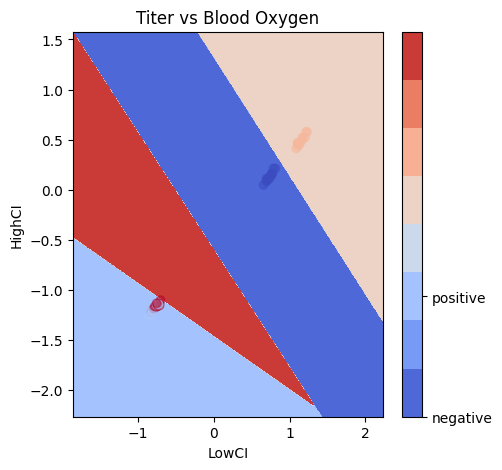

In [34]:
FIGURE_SIZE = 5
FIGURE_RESOLUTION = 500
FIGURE_COLORMAP = 'coolwarm'

def visualize_decision_boundary(classifier, features, labels, title = None):
    """
    Visualize the decision boundary of a trained binary classifier
    using the FIRST TWO columns of the passed in features.
    """

    figure, axis = matplotlib.pyplot.subplots(1, 1, figsize = (FIGURE_SIZE, FIGURE_SIZE))
    axis.set_title(title)

    # Draw the decision boundary.
    decision_boundary = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        classifier, features,
        response_method = "predict", ax = axis,
        xlabel = features.columns[0], ylabel = features.columns[1],
        cmap = FIGURE_COLORMAP, grid_resolution = FIGURE_RESOLUTION
    )

    # Also display the data points.
    axis.scatter(
        features[features.columns[0]], features[features.columns[1]],
        c = labels, cmap = FIGURE_COLORMAP, alpha = 0.5,
    )

    # Add a legend for the colors.
    colorbar = figure.colorbar(decision_boundary.surface_, ax = axis, ticks = [0, 1])
    colorbar.ax.set_yticklabels(["negative", "positive"])

    return axis

# Make a classifier we want to use.
classifier = sklearn.linear_model.LogisticRegression()

# Pick the two features we want to see.
two_features = all_datasets['By Sexual orientation Subgroup_Straight'][['LowCI', 'HighCI']]

classifier.fit(two_features, all_datasets['By Sexual orientation Subgroup_Straight']['Indicator'])
visualize_decision_boundary(classifier, two_features, all_datasets['By Sexual orientation Subgroup_Straight']['Indicator'], "Titer vs Blood Oxygen")

print("Accuracy: ", classifier.score(two_features, all_datasets['By Sexual orientation Subgroup_Straight']['Indicator']))